In [98]:
# Load Jonah's results

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import scipy.stats
import astropy.io.fits as fits

results = np.recfromcsv('blending_dwarf_parameters_new.csv')

In [99]:
ext = 3
recovered_mag = (results['recovered_absmag_ec{}'.format(ext)])
bad_cut = (recovered_mag > 0) | np.isnan(recovered_mag)
results = results[~bad_cut]

(0.6671615914699183, 1.2179968979270492e-07, 0.07790553288681094)


Text(0.5,1,'fit = 0.48*x + 2.58')

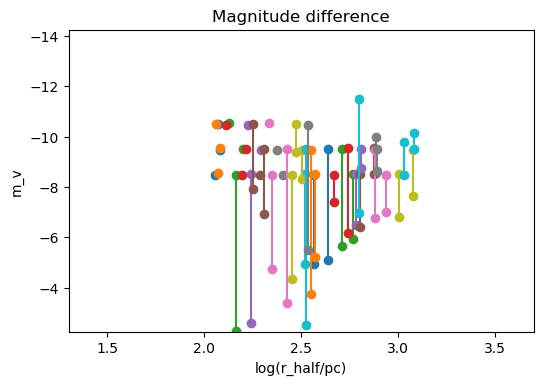

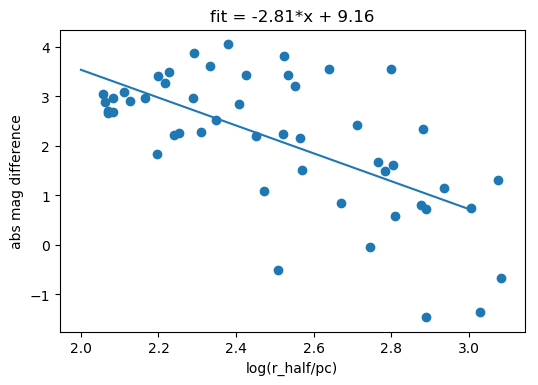

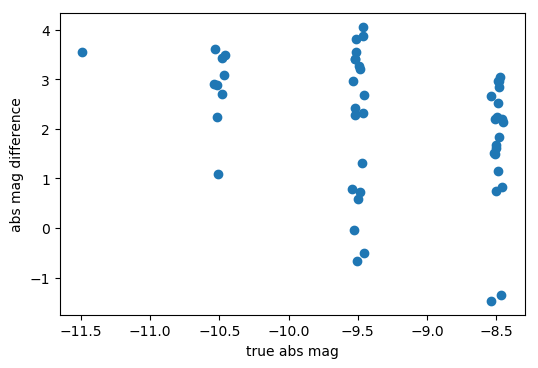

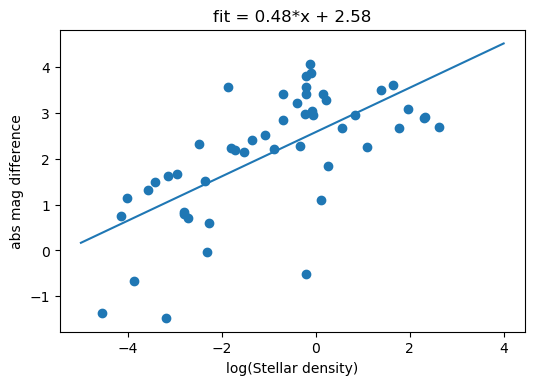

In [101]:
results = results[50:100]
delta = results['recovered_absmag_ec{}'.format(ext)] - results['m_v']

plt.figure()
for dwarf in results:
    x = dwarf['logrhalf_pc']
    true_mag = dwarf['m_v']
    recovered_mag = dwarf['recovered_absmag_ec2']
    plt.plot([x,x], [true_mag, recovered_mag], '-o')
plt.xlim(1.3, 3.7)
plt.ylim(-14.25, -2.25)
plt.gca().invert_yaxis()
plt.ylabel('m_v')
plt.xlabel('log(r_half/pc)')
plt.title('Magnitude difference')

plt.figure()
plt.scatter(results['logrhalf_pc'], delta)
plt.xlabel('log(r_half/pc)')
plt.ylabel('abs mag difference')
fit = np.polyfit(results['logrhalf_pc'], delta, 1)
m,b = fit
fit_func = np.poly1d(fit)
xx = np.arange(2.0, 3.3)
plt.plot(xx, fit_func(xx))
plt.title("fit = {:.2f}*x + {:.2f}".format(m,b))


plt.figure()
plt.scatter(results['m_v'], delta)
plt.xlabel('true abs mag')
plt.ylabel('abs mag difference')

plt.figure()
plt.scatter(np.log(results['density']), delta)
plt.xlabel('log(Stellar density)')
plt.ylabel('abs mag difference')
m, b, r, p, std_err = scipy.stats.linregress(np.log(results['density']), delta)
print(r, p, std_err)
xx = np.arange(-5, 5)
yy = m*xx + b
plt.plot(xx, yy)
plt.title("fit = {:.2f}*x + {:.2f}".format(m,b))

density = n/area. My paper is stronger if delta(density) is smaller at a given density. I can't change delta. So I want density to be larger for a given delta. So I want area to be smaller. So I want to use r, not a. which means radius = a*sqrt(1-ell)

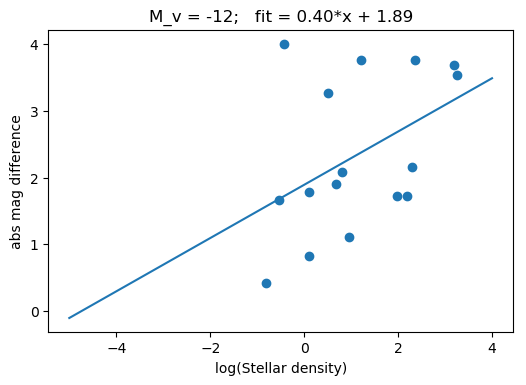

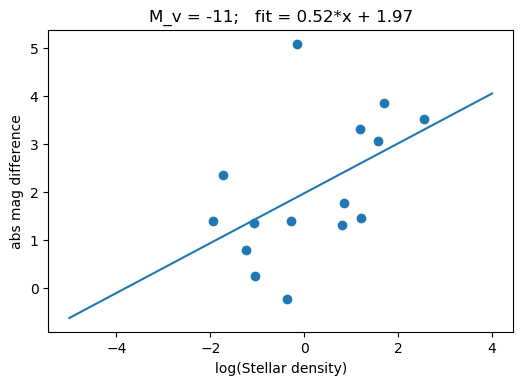

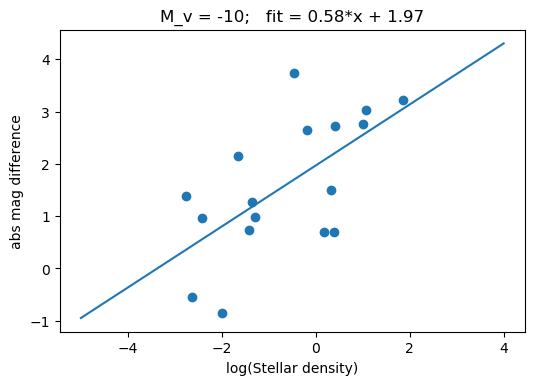

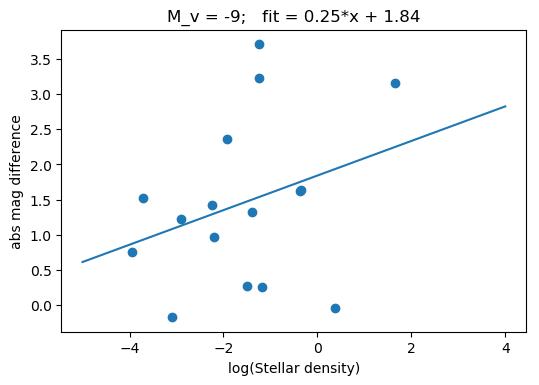

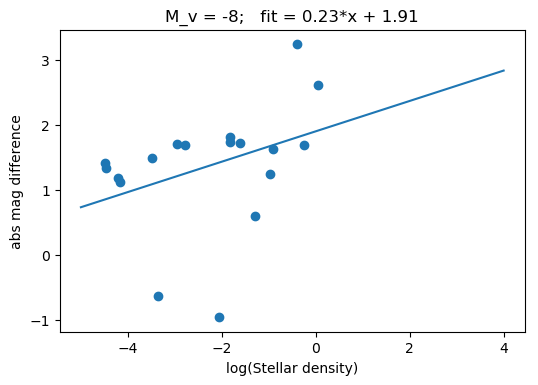

In [62]:
# Stellar density dependence, binned by m_v

for mv in [-12, -11, -10, -9, -8]:
    cut = abs(results['m_v'] - mv) < 0.3
    plt.figure()
    plt.scatter(np.log(results[cut]['density']), delta[cut])
    plt.xlabel('log(Stellar density)')
    plt.ylabel('abs mag difference')
    plt.title('M_v = {}'.format(mv))
    
    fit = np.polyfit(np.log(results[cut]['density']), delta[cut], 1)
    m,b = fit
    fit_func = np.poly1d(fit)
    xx = np.arange(-5, 5)
    plt.plot(xx, fit_func(xx))
    plt.title("M_v = {};   ".format(mv) + "fit = {:.2f}*x + {:.2f}".format(m,b))

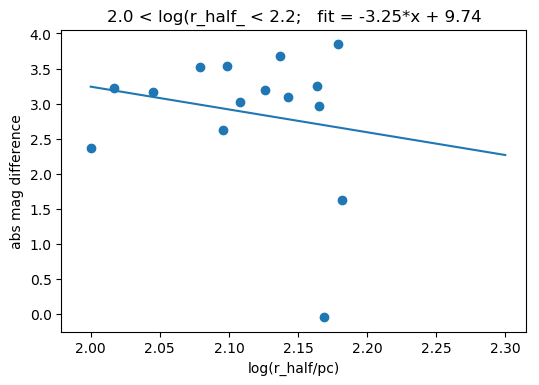

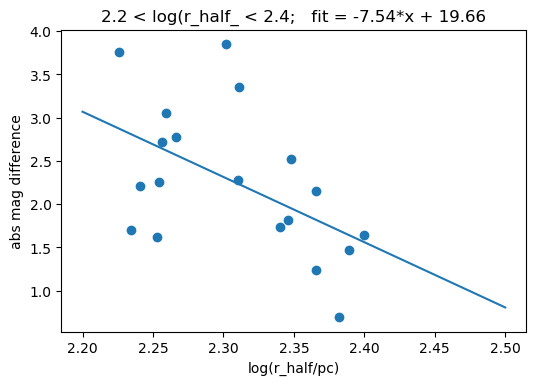

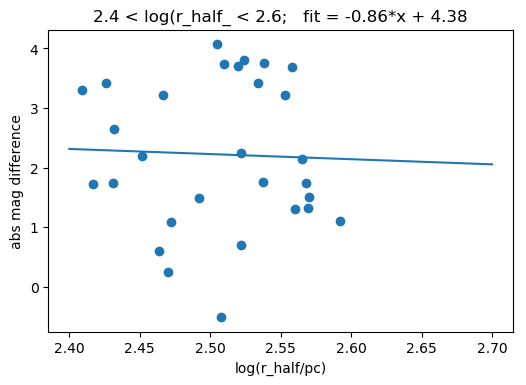

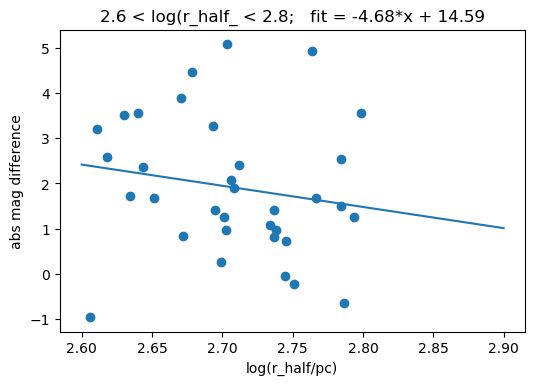

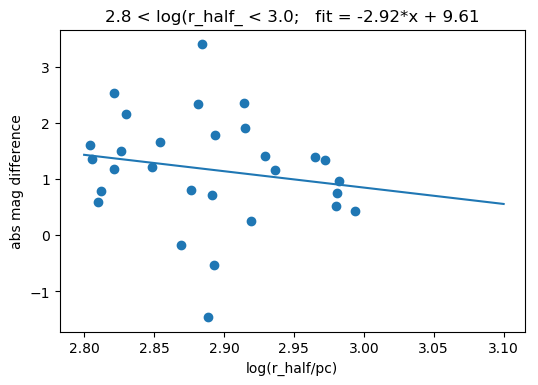

In [63]:
# r_half dependence, binned by r_half

bins = np.arange(2.0, 3.1, 0.2)
for i in range(len(bins)-1):
    cut = (bins[i] < results['logrhalf_pc']) & (results['logrhalf_pc'] < bins[i+1])
    
    plt.figure()
    plt.scatter(results[cut]['logrhalf_pc'], delta[cut])
    plt.xlabel('log(r_half/pc)')
    plt.ylabel('abs mag difference')
    fit = np.polyfit(results['logrhalf_pc'][cut], delta[cut], 1)
    m,b = fit
    fit_func = np.poly1d(fit)
    xx = np.arange(bins[i], bins[i+1]+0.1, 0.05)
    plt.plot(xx, fit_func(xx))
    plt.title("{} < log(r_half_ < {};   fit = {:.2f}*x + {:.2f}".format(bins[i], bins[i+1], m,b))

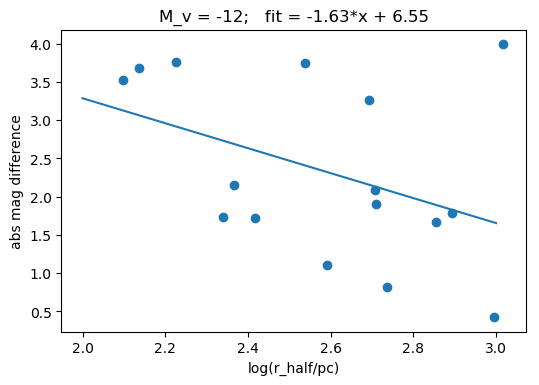

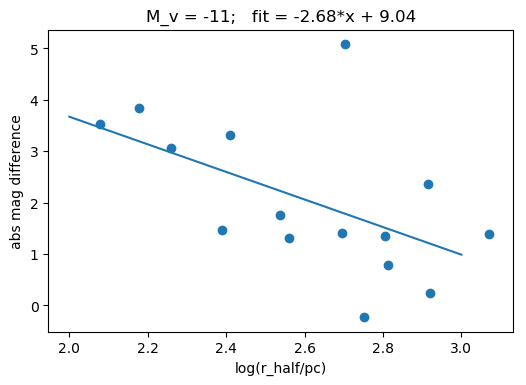

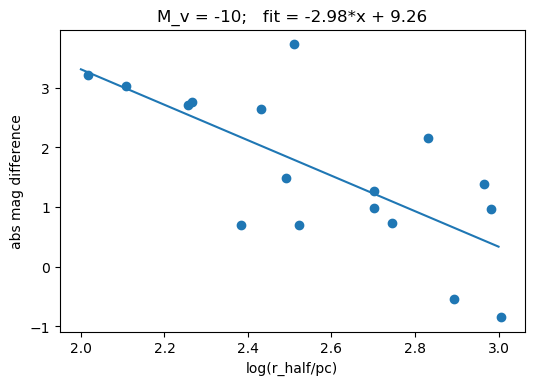

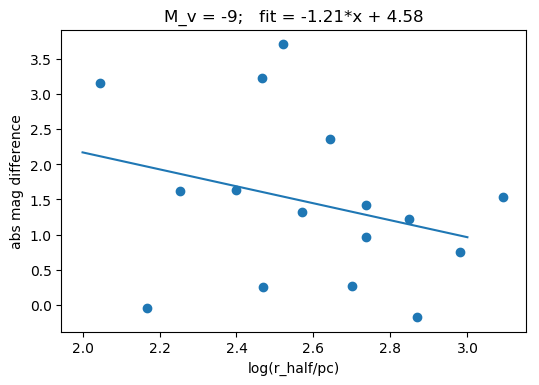

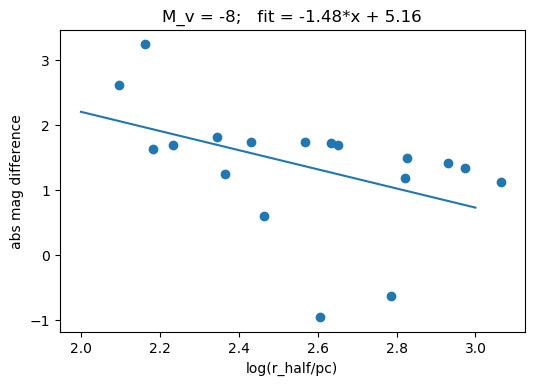

In [64]:
#r_half dependence, binned by m_v

for mv in [-12, -11, -10, -9, -8]:
    cut = abs(results['m_v'] - mv) < 0.3
    plt.figure()
    plt.scatter(results[cut]['logrhalf_pc'], delta[cut])
    plt.xlabel('log(r_half/pc)')
    plt.ylabel('abs mag difference')
    plt.title('M_v = {}'.format(mv))
    
    fit = np.polyfit(results[cut]['logrhalf_pc'], delta[cut], 1)
    m,b = fit
    fit_func = np.poly1d(fit)
    xx = np.arange(2.0, 3.1, 0.2)
    plt.plot(xx, fit_func(xx))
    plt.title("M_v = {};   ".format(mv) + "fit = {:.2f}*x + {:.2f}".format(m,b))
    
# This is basically just recapitulating the stellar density dependence; 
# with m_v fixed, varying r_half is the same as varying stellar density

In [31]:
dtable = fits.open('density_table.fits')[1].data

for i in range(len(dtable)):
    print dtable[i]['abs_mag'], dtable[i]['std']/dtable[i]['density']

-2.5 0.134925978271698
-2.5 0.14181038295823994
-2.5 0.13690094070227993
-2.5 0.13233071870238877
-2.5 0.1319118336240322
-2.5 0.13826811579761933
-2.5 0.10484959693069361
-2.5 0.09509849237593462
-2.5 0.14101767597513767
-2.5 0.12747037350190224
-2.5 0.1302928274920148
-2.5 0.12703053308426546
-3.0 0.09930538805447643
-3.0 0.10710760724341299
-3.0 0.10106498819538676
-3.0 0.1087186050069525
-3.0 0.10259630522037828
-3.0 0.10858294138916448
-3.0 0.11499734713360331
-3.0 0.10776657756194324
-3.0 0.09401837570442685
-3.0 0.10476327084343305
-3.0 0.09057668943945847
-3.0 0.11370390963050453
-3.5 0.077094324392408
-3.5 0.08312578532837649
-3.5 0.07242079109538051
-3.5 0.08347266495095614
-3.5 0.07014444619445408
-3.5 0.07844010524541273
-3.5 0.09269420079879269
-3.5 0.0823066318195818
-3.5 0.08298893012653369
-3.5 0.07617582363260259
-3.5 0.08227223318246289
-3.5 0.09970973548660204
-4.0 0.055634055948688844
-4.0 0.06498564905781824
-4.0 0.07954009120801155
-4.0 0.06615416246758253
-4.0 0.

-4.0 0.13169257336608184
-4.0 0.12147882552743866
-4.0 0.10811699408884748
-4.0 0.11355492063314558
-4.0 0.13930169713380527
-4.0 0.13796666259304655
-4.5 0.10103150970390477
-4.5 0.09921054679039826
-4.5 0.0993501874967372
-4.5 0.11599220393483486
-4.5 0.10814764423506573
-4.5 0.08978313699164989
-4.5 0.10415153311282674
-11.5 0.0018940741497310673
-4.5 0.08484490415022139
-4.5 0.1139580583366123
-4.5 0.10417364855532077
-4.5 0.09378050144328012
-11.5 0.0021295500992095677
-11.5 0.0020108456036406013
-4.5 0.10434162271802132
-11.5 0.0016815634976537965
-5.0 0.07360795250599424
-5.0 0.0693437752867551
-5.0 0.0762676463020107
-5.0 0.10175104282696397
-5.0 0.0826908658507955
-5.0 0.08256500774189493
-5.0 0.08252833480012697
-5.0 0.09346529171108818
-5.0 0.08114583201855113
-5.0 0.07272778578402499
-5.0 0.07520061444467388
-5.0 0.07298376464311662
-5.5 0.06866829509414799
-5.5 0.06494288527559333
-5.5 0.06932158462213404
-5.5 0.06579473170129357
-5.5 0.06046276799356008
-5.5 0.08390582127

-11.5 0.007349356181900295
-6.0 0.0992380779551474
-6.0 0.10902898435507984
-6.0 0.10645087702308312
-6.0 0.14132123447978848
-6.0 0.10195012790874051
-6.0 0.11752279915147598
-6.0 0.11964519838636249
-6.0 0.10438703192489167
-6.0 0.10322699599558365
-6.0 0.10858552865949829
-6.0 0.10186159281350934
-6.0 0.10990017528654787
-6.5 0.09159830405325134
-6.5 0.09239323863470705
-6.5 0.085573019810048
-6.5 0.08594765374761824
-6.5 0.09438561905591274
-6.5 0.08337972418385538
-6.5 0.07350061195107709
-6.5 0.08894535810598177
-6.5 0.09994860714764647
-6.5 0.08720815540780161
-6.5 0.10766773258483568
-6.5 0.0848143244697771
-7.0 0.07995560353588313
-7.0 0.07524855170388674
-7.0 0.06043590699541377
-7.0 0.07043489615191609
-7.0 0.07330166661378312
-7.0 0.06740875021734191
-7.0 0.06814151534821185
-7.0 0.07669414545086121
-7.0 0.06836018791624557
-7.0 0.07558983922182366
-7.0 0.08924517650661054
-7.0 0.06957281969779218
-7.5 0.06152698490021111
-7.5 0.06522448440749413
-7.5 0.04842658863971914
-7

## Old stuff below here

In [2]:
with open('../local_v2.yaml') as ymlfile:
    cfg = yaml.load(ymlfile)
inputs = load_data.Inputs(cfg)

/Users/mcnanna/anaconda2/envs/ugali-env/lib/python2.7/site-packages/ipykernel_launcher.py:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = EXPLICIT
NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [12]:
tucB = simSatellite.SimSatellite(inputs, ra, dec, 1400, -6.9, 80, use_completeness=False, use_efficiency=False)
stars = tucB.stars
cut = stars['PSF_MAG_R_CORRECTED'] < 27.0
stars = stars[cut]
angseps = ugali.utils.projector.angsep(ra, dec, stars['RA'], stars['DEC'])

radius = 0.5 * tucB.a_h
area = np.pi*(radius*3600)**2
n = np.count_nonzero(angseps < radius)
density = n/area
print(round(area,1), n, round(density,3))

(109.1, 181, 1.659)
